In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import product

## Read in Data

We begin by reading in the trained parameters for several iteration times shown in their file names.

In [2]:
# Read the rest of the data
a_df_iter1 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/a_iter=1_eloc=1695.073718.dat', sep='\t', header=None)
b_df_iter1 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/b_iter=1_eloc=1695.073718.dat', sep='\t', header=None)
W_df_iter1 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/W_iter=1_eloc=1695.073718.dat', sep='\s+', header=None)

a_df_iter10 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/a_iter=10_eloc=794.213381.dat', sep='\t', header=None)
b_df_iter10 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/b_iter=10_eloc=794.213381.dat', sep='\t', header=None)
W_df_iter10 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/W_iter=10_eloc=794.213381.dat', sep='\s+', header=None)

a_df_iter100 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/a_iter=100_eloc=-34.761474.dat', sep='\t', header=None)
b_df_iter100 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/b_iter=100_eloc=-34.761474.dat', sep='\t', header=None)
W_df_iter100 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/W_iter=100_eloc=-34.761474.dat', sep='\s+', header=None)

a_df_iter1000 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/a_iter=1000_eloc=-144.804402.dat', sep='\t', header=None)
b_df_iter1000 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/b_iter=1000_eloc=-144.804402.dat', sep='\t', header=None)
W_df_iter1000 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/W_iter=1000_eloc=-144.804402.dat', sep='\s+', header=None)

a_df_iter10000 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/a_iter=10000_eloc=-145.317434.dat', sep='\t', header=None)
b_df_iter10000 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/b_iter=10000_eloc=-145.317434.dat', sep='\t', header=None)
W_df_iter10000 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/W_iter=10000_eloc=-145.317434.dat', sep='\s+', header=None)

a_df_iter15000 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/a_iter=15000_eloc=-145.318291.dat', sep='\t', header=None)
b_df_iter15000 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/b_iter=15000_eloc=-145.318291.dat', sep='\t', header=None)
W_df_iter15000 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/W_iter=15000_eloc=-145.318291.dat', sep='\s+', header=None)

a_df_iter20000 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/a_iter=20000_eloc=-145.318752.dat', sep='\t', header=None)
b_df_iter20000 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/b_iter=20000_eloc=-145.318752.dat', sep='\t', header=None)
W_df_iter20000 = pd.read_csv('./data/nsweeps=100,nv=10,nh=20/W_iter=20000_eloc=-145.318752.dat', sep='\s+', header=None)

In [3]:
# Put the dataframes into lists of lists
list_params_iter1 = [a_df_iter1, b_df_iter1, W_df_iter1]
list_params_iter10 = [a_df_iter10, b_df_iter10, W_df_iter10]
list_params_iter100 = [a_df_iter100, b_df_iter100, W_df_iter100]
list_params_iter1000 = [a_df_iter1000, b_df_iter1000, W_df_iter1000]
list_params_iter10000 = [a_df_iter10000, b_df_iter10000, W_df_iter10000]
list_params_iter15000 = [a_df_iter15000, b_df_iter15000, W_df_iter15000]
list_params_iter20000 = [a_df_iter20000, b_df_iter20000, W_df_iter20000]

list_list_params = [list_params_iter1, list_params_iter10, list_params_iter100, list_params_iter1000, list_params_iter10000, list_params_iter15000, list_params_iter20000]

# Compare all Wavefunctions

Here we use the parameters that were read in to evaluate the PDF of the RBM (at each value of x) - and then square root it to plot $\psi$.

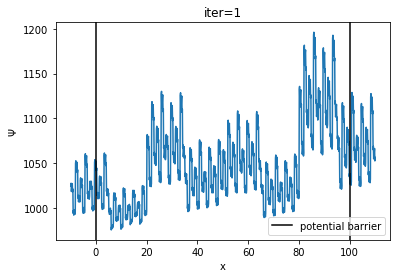

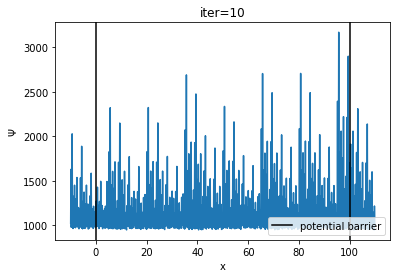

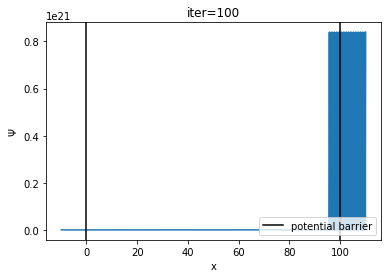

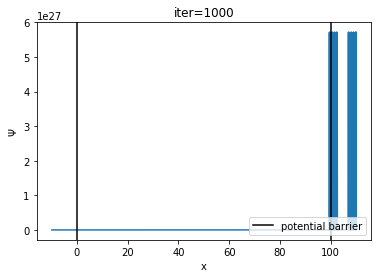

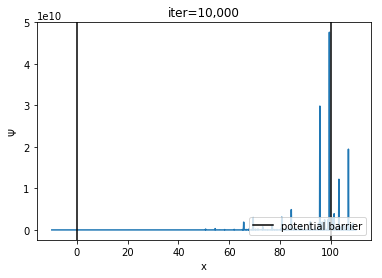

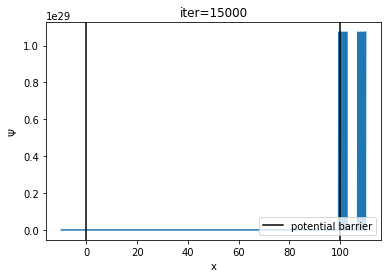

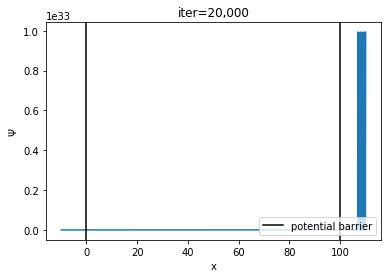

In [5]:
list_data_names = ['iter=1', 'iter=10', 'iter=100', 'iter=1000', 'iter=10,000', 'iter=15000', 'iter=20,000'] 
counter = 0

# Loop over each dataset
for list_list in list_list_params:
    a = np.array(list_list[0])
    b = np.array(list_list[1])
    W = np.array(list_list[2])

    a = np.flip(a,0)  # We defined our bytes in reverse order, flip them so it is consistent
    W = np.flip(W,0)

    # Create bytes representing meshpoint location, i
    sigma = np.zeros((1024,10)) 
    ind = 0
    for i in product([0,1], repeat=10):
        sigma[ind,:] = i
        ind+=1
    sigma = np.flip(sigma,1)  # Flip them for consistency

    x = np.arange(-10+120/1024, 110+120/1024, 120/1024)

    # Evaluate PDF, prob, using parameters of the RBM
    prob = np.zeros(1024)
    for n in range(1024):
        firstsum = np.dot(sigma[n,:],a)
        productsum = 1
        for j in range(len(b)):
            productsum *= 2*np.cosh(np.dot(W[:,j],sigma[n,:])+ b[j])
        prob[n]= np.exp(firstsum) * productsum        

    # Convert PDF into wavefn., plot it
    plt.plot(x, np.sqrt(prob))
    plt.title(list_data_names[counter])
    counter += 1
    plt.ylabel('$\Psi$')
    plt.xlabel('x')
    plt.axvline(x=0, c='k', label='potential barrier')
    plt.axvline(x=100, c='k')
    plt.legend(loc=4)
#     plt.ylim(0,10000)
    plt.show()